# Introduction


## About the Company
Cyclistic, a fictional company, introduced a successful bike-share program in 2016. Since its inception, it has expanded to include about 5,824 geotracked bicycles, which can be locked into any of the 692 stations spread throughout Chicago. Riders can unlock a bike from one station and return it to any other station.

## Business Task 
Discover how members and casual riders use Cyclistic bikes differently and design marketing strategies aimed at converting casual riders into annual members.

## Data Sources 
The data used in this analysis were sourced from Kaggle's Cyclistic dataset, covering the period from June 2023 to May 2024. The dataset comprised approximately 5,743,278 rows and 13 columns. The columns include:

* Ride_id: Unique identifier for each ride.
* Rideable_type: Type of bike used (electric, classic, docked)
* Started_at: Date and time when the ride began.
* Ended_at: Date and time when the ride ended.
* Start_station_name: Name of the station where the ride began.
* Start_station_id: ID of the station where the ride began.
* End_station_name: Name of the station where the ride ended.
* End_station_id: ID of the station where the ride ended.
* Start_lat: Starting latitude.
* Start_lng: Starting longitude.
* End_lat: Ending latitude.
* End_lng: Ending longitude.

# Loading Dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

#________________________Data Extraction________________________________
# Create an empty list to store dataframes
df_list = []

# Walk through the input directory to find all CSV files
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        # Create the full path to the file
        file_path = os.path.join(dirname, filename)
        # Read the file into a dataframe
        df = pd.read_csv(file_path)
        # Append the dataframe to the list
        df_list.append(df)

# Concatenate all dataframes in the list
df = pd.concat(df_list, ignore_index=True)

# Exploring Data

In [2]:
# Display a sample dataframe
df.sample(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1419179,2D97603FB06FF6BF,electric_bike,2023-08-13 19:46:19,2023-08-13 20:35:58,Pine Grove Ave & Waveland Ave,TA1307000150,Broadway & Sheridan Rd,13323,41.949275,-87.646551,41.952833,-87.649993,casual
527367,AEB09751CBA54D56,classic_bike,2023-07-12 16:17:30,2023-07-12 16:21:15,Streeter Dr & Grand Ave,13022,Fairbanks St & Superior St,18003,41.892278,-87.612043,41.895748,-87.620104,member
43558,F57163FF8F67E2D1,classic_bike,2023-07-26 12:45:11,2023-07-26 13:03:26,Ashland Ave & Division St,13061,Dearborn Pkwy & Delaware Pl,TA1307000128,41.903450,-87.667747,41.898969,-87.629912,member
3359461,241ADE682B778124,electric_bike,2024-05-17 13:29:23,2024-05-17 13:49:00,Aberdeen St & Jackson Blvd,13157,NaN,NaN,41.877766,-87.654861,41.850000,-87.680000,member
697131,0F83C9AB6B40CB1B,electric_bike,2023-07-20 17:17:24,2023-07-20 17:24:20,Lakefront Trail & Bryn Mawr Ave,15576,NaN,NaN,41.984051,-87.652243,41.980000,-87.670000,casual


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5743278 entries, 0 to 5743277
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 569.6+ MB


In [4]:
df.describe()

,start_lat,start_lng,end_lat,end_lng
count,5.743278e+06,5.743278e+06,5.735594e+06,5.735594e+06
mean,4.190292e+01,-8.764680e+01,4.190325e+01,-8.764697e+01
std,4.514061e-02,2.728732e-02,5.447490e-02,6.906322e-02
min,4.163000e+01,-8.794000e+01,0.000000e+00,-8.816000e+01
25%,4.188096e+01,-8.766000e+01,4.188103e+01,-8.766013e+01
50%,4.189897e+01,-8.764375e+01,4.189993e+01,-8.764404e+01
75%,4.193000e+01,-8.762979e+01,4.193059e+01,-8.762991e+01
max,4.207000e+01,-8.746000e+01,4.218000e+01,0.000000e+00


In [5]:
categorical = df.dtypes[df.dtypes == "object"].index
df[categorical].describe()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
count,5743278,5743278,5743278,5743278,4838041,4838041,4786699,4786699,5743278
unique,5743278,3,4841289,4852976,1645,1610,1658,1623,2
top,9340B064F0AEE130,electric_bike,2023-07-13 17:38:08,2023-12-08 09:54:28,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,member
freq,1,2864195,8,18,64223,64223,64619,64619,3693789


Checking for nulls in all columns. It appears we have 905,237 nulls in "start_station_name" and "start_station_id", 956,579 nulls in "end_station_name" and "end_station_id", and 7,684 nulls in "end_lat" and "end_lng".

In [6]:
#Checking for nulls
print(df.isnull().sum())

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    905237
start_station_id      905237
end_station_name      956579
end_station_id        956579
start_lat                  0
start_lng                  0
end_lat                 7684
end_lng                 7684
member_casual              0
dtype: int64


Checking for duplicates in the identifier column.

In [7]:
#Checking for duplicate values in primary key
dup_list = df[df['ride_id'].duplicated(keep=False)]

if not dup_list.empty:
    print('duplicates in ride_id \n', dup_list['ride_id'].count())
else:
    print('No duplicates in Ride_id\n\n')

No duplicates in Ride_id




# Data Cleaning

## Removing Inconsistencies

There are 1,806 rows where "started_at" values are equal to or greater than "ended_at" values. This compromises data integrity, as it is impossible for a ride to start after it ends. Additionally, when "started_at" equals "ended_at," it suggests a ride duration of 0 hours, 0 minutes, and 0 seconds, which skews the dataset. To address these issues, we will remove the affected rows.

In [8]:
# Converting started_at and ended_at columns to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

neg_df = df[df['started_at'] >= df['ended_at']].copy()

#checking for negative values 
neg_df[['ride_id', 'started_at', 'ended_at']]

,ride_id,started_at,ended_at
12803,5C1564EF34FE0C9B,2023-07-31 07:39:56,2023-07-31 07:39:56
16270,9E8EB355F2B879C6,2023-07-20 15:50:58,2023-07-20 15:50:58
21510,92E9649507127D92,2023-07-14 09:29:50,2023-07-14 09:29:50
27557,80769EAE6480B2B0,2023-07-03 23:01:05,2023-07-03 23:01:05
34197,DB118F9DFD6A3311,2023-07-07 11:54:50,2023-07-07 11:54:50
...,...,...,...
5722734,DA14AAB5FEEBF5BC,2023-10-05 21:39:44,2023-10-05 21:39:44
5727537,F141500156F05E36,2023-10-30 18:15:53,2023-10-30 18:15:53
5742683,79BF364BF3F1D17A,2023-10-13 11:11:36,2023-10-13 11:11:36
5743182,BB52BEC6D7201FFC,2023-10-01 14:34:49,2023-10-01 14:34:49


In [9]:
#dropping rows with inconsistent data in 'started_at' and 'ended_at' column
clean_df = df[~df['ride_id'].isin(neg_df['ride_id'])].copy()

# Reset the index
clean_df.reset_index(drop=True, inplace=True)

clean_df 

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member
1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member
2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member
3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member
4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5741467,CB82F1F5D0505469,classic_bike,2023-10-30 07:35:46,2023-10-30 07:49:30,Clinton St & Washington Blvd,WL-012,Fairbanks Ct & Grand Ave,TA1305000003,41.883380,-87.641170,41.891847,-87.620580,member
5741468,E2C362589E4AD3A9,classic_bike,2023-10-10 06:29:55,2023-10-10 06:45:19,Clark St & Lincoln Ave,13179,Fairbanks Ct & Grand Ave,TA1305000003,41.915689,-87.634600,41.891847,-87.620580,member
5741469,965D4156EDECF21A,classic_bike,2023-10-26 06:26:23,2023-10-26 06:39:43,Clinton St & Washington Blvd,WL-012,Fairbanks Ct & Grand Ave,TA1305000003,41.883380,-87.641170,41.891847,-87.620580,member
5741470,0919ED32225E4D31,classic_bike,2023-10-09 08:47:29,2023-10-09 08:47:33,Michigan Ave & 14th St,TA1307000124,Michigan Ave & 14th St,TA1307000124,41.864059,-87.623727,41.864059,-87.623727,member


## Handling Missing Values

Now that we have addressed the inconsistent data, we can focus on the 905,237 missing values in the "start_station_name" column identified during data exploration. To fill these values and uncover trends in rider behavior, we will use a machine learning model to predict missing values based on the available features. I decided to use the K-Nearest Neighbors model because it leverages the similarity between data points such as location ("start_lat" and "start_lng") and station name ("start_station_name"), as nearby points are likely to have the same or similar start station names.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [11]:
# Separate rows with and without missing start_station_name
start_station_known = clean_df[clean_df['start_station_name'].notna()].copy()
start_station_missing = clean_df[clean_df['start_station_name'].isna()].copy()

# Create a LabelEncoder instance and encode the known 'start_station_name'
le = LabelEncoder()
start_station_known["start_station_name"] = le.fit_transform(start_station_known["start_station_name"])

# making the known 'start_lat' and 'start_lng' columns our features and known 'start_station_name' our target
X = start_station_known[['start_lat', 'start_lng']]
y = start_station_known['start_station_name']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Evaluate the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 1.00


We want an accuracy of 0.8 or above to use the model to fill in the missing values in the "start_station_name".

In [12]:
if accuracy > 0.8: 
    X_missing = start_station_missing[['start_lat', 'start_lng']]
    predicted_start_station_names = knn.predict(X_missing)
    start_station_missing['start_station_name'] = le.inverse_transform(predicted_start_station_names)

    # Reconstruct the clean_df with the predicted values
    clean_df.loc[clean_df['start_station_name'].isna(), 'start_station_name'] = start_station_missing['start_station_name']

The missing values in "start_station_name" have successfully been filled. Now let’s check if "end_station_name" has any nulls, as we will use this column to discover behavioral trends between member and casual riders as well.

In [13]:
print("end_station_name total nulls: ", clean_df['end_station_name'].isnull().sum())

end_station_name total nulls:  955579


In [14]:
print('Total of nulls where end_station_name, end_lat, and end_lng are null: ', clean_df[((clean_df['end_lat'].isna()) | (clean_df['end_lng'].isna())) & (clean_df['end_station_name'].isna())].shape[0] )

Total of nulls where end_station_name, end_lat, and end_lng are null:  7568


There are 955,579 rows with missing values in the "end_station_name" column. To fill these gaps, we will use the K-Nearest Neighbors (KNN) model, as we previously did for the "start_station_name" values.

However, before proceeding, it's important to note that 7,568 of these rows also have missing values in the "end_lat" and "end_lng" columns. This poses a challenge, as the KNN model requires non-null "end_lat" and "end_lng" values to accurately predict the missing "end_station_name". Since it’s not feasible to deduce the missing "end_lat" and "end_lng" values, we will leave these fields as null and fill the "end_station_name" with "Unknown" for these specific cases.

In [15]:
#filling the null 'start_station_name' as 'unknown' with corresponding null values in 'end_lat' and 'end_lng'
clean_df.loc[((clean_df['end_lat'].isna()) | (clean_df['end_lng'].isna())) & (clean_df['end_station_name'].isna()), 'end_station_name'] = 'unknown'

clean_df[clean_df['end_station_name'] == 'unknown']

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
602333,7F9574236C7557BE,classic_bike,2023-07-28 22:51:23,2023-07-29 23:51:18,Wells St & Concord Ln,TA1308000050,unknown,NaN,41.912133,-87.634656,NaN,NaN,member
602387,6D6E57EFFB625656,docked_bike,2023-07-14 16:00:44,2023-07-15 17:00:45,Campbell Ave & North Ave,13257,unknown,NaN,41.910535,-87.689556,NaN,NaN,casual
602436,B3DD90BBC1BA94D8,classic_bike,2023-07-30 16:36:33,2023-07-31 17:36:28,Sedgwick St & Schiller St,TA1307000143,unknown,NaN,41.907626,-87.638566,NaN,NaN,casual
602459,50CBFF819F6EF713,docked_bike,2023-07-21 19:20:40,2023-07-30 21:16:57,Shedd Aquarium,15544,unknown,NaN,41.867226,-87.615355,NaN,NaN,casual
602499,917B220E81E32FD3,docked_bike,2023-07-04 20:57:05,2023-07-14 07:21:46,Shedd Aquarium,15544,unknown,NaN,41.867226,-87.615355,NaN,NaN,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5726534,A9274C78601972E8,classic_bike,2023-10-01 11:04:53,2023-10-02 12:04:32,Clinton St & Washington Blvd,WL-012,unknown,NaN,41.883380,-87.641170,NaN,NaN,casual
5726589,491FB7679DE03555,classic_bike,2023-10-27 01:11:56,2023-10-28 02:11:52,Clark St & Lincoln Ave,13179,unknown,NaN,41.915689,-87.634600,NaN,NaN,casual
5726699,A5A5AC0352D929AE,classic_bike,2023-10-22 15:12:06,2023-10-23 16:11:43,Clark St & Lincoln Ave,13179,unknown,NaN,41.915689,-87.634600,NaN,NaN,casual
5726826,51BA6585A4F95296,classic_bike,2023-10-19 13:01:15,2023-10-20 14:01:10,Clinton St & Washington Blvd,WL-012,unknown,NaN,41.883380,-87.641170,NaN,NaN,member


Next, we will focus on filling the "end_lat" and "end_lng" for the rows that have a non-null "end_station_name". To do this, we will calculate the average "end_lat" and "end_lng" for each end station and use these averages to fill in only the null "end_lat" and "end_lng" values.

In [16]:
#filtering to create a df with only rows that have non-null end_station_name and null end_lat and end_lng
df_inconsistent = clean_df[(clean_df['end_station_name'] != 'unknown') & ((clean_df['end_lat'] == 0) | (clean_df['end_lng'] == 0) | (clean_df['end_lat'].isnull()))].copy()

#creating a list to store station names
station_list = []
station_list = df_inconsistent['end_station_name']


for i in station_list:
    
    # Calculate the average end_lat for stations
    avg_end_lat = clean_df[clean_df['end_station_name'] == i ]['end_lat'].mean().copy()
    avg_end_lng = clean_df[clean_df['end_station_name'] == i ]['end_lng'].mean().copy()
    
    # Update rows where start_lat, start_lng, end_lat, or end_lng are zero and null for the specific station
    condition = (clean_df['end_station_name'] == i) & \
                ((clean_df['end_lat'] == 0) | (clean_df['end_lng'] == 0) | (clean_df['end_lat'].isnull())).copy()

    clean_df.loc[condition, 'end_lat'] = avg_end_lat
    clean_df.loc[condition, 'end_lng'] = avg_end_lng

Now that we have filled in the missing values for "end_lat" and "end_lng" we are ready to use the K-Nearest Neighbors model to fill in the 948,011 nulls in "end_station_name".

In [17]:
print("end_station_name total nulls: ", clean_df['end_station_name'].isnull().sum())

end_station_name total nulls:  948011


In [18]:
# Separate rows with and without missing end_station_name
end_station_known = clean_df[(clean_df['end_station_name'].notna()) & (clean_df['end_station_name'] != 'unknown') & ((clean_df['end_lat'].notnull()) | (clean_df['end_lng'].notnull()))].copy()
end_station_missing = clean_df[clean_df['end_station_name'].isna()].copy()

# Create a LabelEncoder instance and encode the known 'end_station_name'
le = LabelEncoder()
end_station_known["end_station_name"] = le.fit_transform(end_station_known["end_station_name"])

# Features and target
X = end_station_known[['end_lat', 'end_lng']]
y = end_station_known['end_station_name']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Evaluate the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 1.00


We want an accuracy of 0.8 or above to use the model to fill in the missing values in the "end_station_name".

In [19]:
# If the accuracy is satisfactory, predict missing end_station_name values
if accuracy > 0.8: 
    X_missing = end_station_missing[['end_lat', 'end_lng']]
    predicted_end_station_names = knn.predict(X_missing)
    end_station_missing['end_station_name'] = le.inverse_transform(predicted_end_station_names)

    # Reconstruct the clean_df with the predicted values
    clean_df.loc[clean_df['end_station_name'].isna(), 'end_station_name'] = end_station_missing['end_station_name']

Zero nulls left in "start_station_name" and "end_station_name". 

In [20]:
print(clean_df[['start_station_name', 'end_station_name']].isnull().sum())

start_station_name    0
end_station_name      0
dtype: int64


### Removing Irrevent Columns

The next step in our cleaning process is to remove irrevent columns.

Since we now have "start_station_name" and "end_station_name" without nulls, we no longer need the following columns in our analysis: "start_station_id", "end_station_id", "start_lat", "start_lng", "end_lat", and "end_lng".

In [21]:
#filtering out columns start_station_id, end_station_id, start_lat, start_lng, end_lat, end_lng
clean_df = clean_df[['ride_id','rideable_type','started_at','ended_at','start_station_name', 'end_station_name', 'member_casual']].copy()
clean_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual
0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,Public Rack - Racine Ave & 109th Pl,member
1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,Milwaukee Ave & Grand Ave,member
2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,Damen Ave & Pierce Ave,member
3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,Clinton St & Madison St,member
4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,Montrose Harbor,member
...,...,...,...,...,...,...,...
5741467,CB82F1F5D0505469,classic_bike,2023-10-30 07:35:46,2023-10-30 07:49:30,Clinton St & Washington Blvd,Fairbanks Ct & Grand Ave,member
5741468,E2C362589E4AD3A9,classic_bike,2023-10-10 06:29:55,2023-10-10 06:45:19,Clark St & Lincoln Ave,Fairbanks Ct & Grand Ave,member
5741469,965D4156EDECF21A,classic_bike,2023-10-26 06:26:23,2023-10-26 06:39:43,Clinton St & Washington Blvd,Fairbanks Ct & Grand Ave,member
5741470,0919ED32225E4D31,classic_bike,2023-10-09 08:47:29,2023-10-09 08:47:33,Michigan Ave & 14th St,Michigan Ave & 14th St,member


# Data Manipulation and Feature Engineering
After converting the "started_at" and "ended_at" columns to the datetime datatype during the data cleaning process, I will engineer a new feature called "ride_length". This feature will provide deeper insights into rider behavior by "member_casual" type. The "ride_length" column represents the duration of each ride, calculated as the difference between the "started_at" and "ended_at" columns.

In [22]:
# Calculating the ride_length from ended_at and started_at column for analysis
clean_df['ride_length'] = pd.to_timedelta(clean_df['ended_at'] - clean_df['started_at'])

I engineered a new feature called the "day_of_week" column, which indicates the day of the week each ride began.

In [23]:
#calulating day of week and storing them in a column for analysis
clean_df['day_of_week'] = clean_df['started_at'].dt.day_name()

Furthermore, I extracted the month and year from the "started_at" column to create the "month_year" column, which displays the month and year of each ride.

In [24]:
#calulating month and year and storing them in a column for analysis
clean_df['month_year'] = clean_df['started_at'].dt.to_period('M')

# Analyze

## DF Analysis

In [25]:
clean_df.describe()

,started_at,ended_at,ride_length
count,5741472,5741472,5741472
mean,2023-11-01 04:06:29.133458944,2023-11-01 04:24:51.580713216,0 days 00:18:22.447257776
min,2023-06-01 00:00:44,2023-06-01 00:02:56,0 days 00:00:01
25%,2023-07-30 00:40:46.500000,2023-07-30 01:06:03,0 days 00:05:32
50%,2023-09-28 20:45:24.500000,2023-09-28 20:58:42.500000,0 days 00:09:42
75%,2024-02-16 17:14:45,2024-02-16 17:27:02.750000128,0 days 00:17:12
max,2024-05-31 23:59:57,2024-06-02 00:56:55,68 days 09:29:04
std,NaN,NaN,0 days 02:47:26.660369417


In [26]:
categorical = clean_df.dtypes[clean_df.dtypes == "object"].index
clean_df[categorical].describe()

,ride_id,rideable_type,start_station_name,end_station_name,member_casual,day_of_week
count,5741472,5741472,5741472,5741472,5741472,5741472
unique,5741472,3,1645,1659,2,7
top,9340B064F0AEE130,electric_bike,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,member,Saturday
freq,1,2862609,74654,76153,3692723,910977


In [27]:
print('Average ride length for all member types: ', clean_df['ride_length'].mean())

Average ride length for all member types:  0 days 00:18:22.447257776


In [28]:
clean_df.groupby('rideable_type')['ride_id'].count().reset_index(name='ride count')

,rideable_type,ride count
0,classic_bike,2829508
1,docked_bike,49355
2,electric_bike,2862609


In [29]:
# Grouping by 'start_station_name' and counting 'ride_id'
df_start_station = clean_df.groupby('start_station_name')['ride_id'].count().reset_index(name='ride count').copy()

# Sorting the DataFrame by count in descending order and selecting the top 5 start stations
df_start_station.sort_values(by='ride count', ascending=False).head(5)

,start_station_name,ride count
1524,Streeter Dr & Grand Ave,74654
178,Clark St & Elm St,57706
279,DuSable Lake Shore Dr & North Blvd,50220
381,Halsted St & Wrightwood Ave,49406
278,DuSable Lake Shore Dr & Monroe St,44948


In [30]:
# Grouping by 'end_station_name' and counting 'ride_id'
df_end_station = clean_df.groupby('end_station_name')['ride_id'].count().reset_index(name='count').copy()

# Sorting the DataFrame by count in descending order and selecting the top 5 end stations
df_end_station.sort_values(by='count', ascending=False).head(5)

,end_station_name,count
1536,Streeter Dr & Grand Ave,76153
472,Kingsbury St & Kinzie St,49368
1634,Wilton Ave & Belmont Ave,49316
489,LaSalle St & Illinois St,49287
257,Dearborn Pkwy & Delaware Pl,42390


## Casual DF Analysis

In [31]:
# creating a dataframe for casual riders
casual_df = clean_df[clean_df['member_casual'] == 'casual'].copy()

In [32]:
casual_df.describe()

,started_at,ended_at,ride_length
count,2048749,2048749,2048749
mean,2023-10-19 00:32:04.431662592,2023-10-19 01:00:16.234686720,0 days 00:28:11.803025163
min,2023-06-01 00:00:55,2023-06-01 00:04:44,0 days 00:00:01
25%,2023-07-21 15:26:17,2023-07-21 15:54:03,0 days 00:06:45
50%,2023-09-09 12:11:35,2023-09-09 12:41:10,0 days 00:12:06
75%,2024-01-04 16:13:57,2024-01-04 16:33:55,0 days 00:22:42
max,2024-05-31 23:59:56,2024-06-02 00:56:55,68 days 09:29:04
std,NaN,NaN,0 days 04:35:18.473798556


In [33]:
casual_df[categorical].describe()

,ride_id,rideable_type,start_station_name,end_station_name,member_casual,day_of_week
count,2048749,2048749,2048749,2048749,2048749,2048749
unique,2048749,3,1600,1613,1,7
top,27E7E4DEB31705E3,electric_bike,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,casual,Saturday
freq,1,1060664,55035,58998,2048749,426193


In [34]:
print('Average ride length for Casual riders: ', casual_df['ride_length'].mean())

Average ride length for Casual riders:  0 days 00:28:11.803025163


In [35]:
casual_df.groupby('rideable_type')['ride_id'].count().reset_index(name='casual_rider_count')

,rideable_type,casual_rider_count
0,classic_bike,938730
1,docked_bike,49355
2,electric_bike,1060664


In [36]:
casual_df.groupby('month_year')['ride_id'].count().reset_index(name='casual_rider_count')

,month_year,casual_rider_count
0,2023-06,301198
1,2023-07,331252
2,2023-08,311006
3,2023-09,261534
4,2023-10,177007
5,2023-11,98327
6,2023-12,51662
7,2024-01,24446
8,2024-02,47157
9,2024-03,82500


In [37]:
# Grouping by 'start_station_name' and counting 'ride_id'
casual_df_start_station = casual_df.groupby('start_station_name')['ride_id'].count().reset_index(name='casual_rider_count').copy()

# Sorting the DataFrame by count in descending order and selecting the top 5 start stations
casual_df_start_station.sort_values(by='casual_rider_count', ascending=False).head(5)


,start_station_name,casual_rider_count
1479,Streeter Dr & Grand Ave,55035
276,DuSable Lake Shore Dr & Monroe St,33376
277,DuSable Lake Shore Dr & North Blvd,26740
615,Michigan Ave & Oak St,23086
1483,Theater on the Lake,22973


In [38]:
# Grouping by 'end_station_name' and counting 'ride_id'
casual_df_end_station = casual_df.groupby('end_station_name')['ride_id'].count().reset_index(name='casual_rider_count').copy()

# Sorting the DataFrame by count in descending order and selecting the top 5 end stations
casual_df_end_station.sort_values(by='casual_rider_count', ascending=False).head(5)

,end_station_name,casual_rider_count
1491,Streeter Dr & Grand Ave,58998
277,DuSable Lake Shore Dr & Monroe St,29469
617,Michigan Ave & Oak St,23888
278,DuSable Lake Shore Dr & North Blvd,23529
1495,Theater on the Lake,21967


## Member DF Analysis

In [39]:
# creating a dataframe for member riders
member_df = clean_df[clean_df['member_casual'] == 'member'].copy()

In [40]:
member_df.describe()

,started_at,ended_at,ride_length
count,3692723,3692723,3692723
mean,2023-11-08 11:11:25.914918144,2023-11-08 11:24:21.383403264,0 days 00:12:55.468483826
min,2023-06-01 00:00:44,2023-06-01 00:02:56,0 days 00:00:01
25%,2023-08-04 23:06:02,2023-08-04 23:20:48,0 days 00:05:03
50%,2023-10-10 12:48:43,2023-10-10 12:59:48,0 days 00:08:41
75%,2024-02-23 14:30:02,2024-02-23 14:42:59.500000,0 days 00:14:49
max,2024-05-31 23:59:57,2024-06-01 23:57:27,1 days 01:59:48
std,NaN,NaN,0 days 00:38:11.467526265


In [41]:
member_df[categorical].describe()

,ride_id,rideable_type,start_station_name,end_station_name,member_casual,day_of_week
count,3692723,3692723,3692723,3692723,3692723,3692723
unique,3692723,2,1553,1556,1,7
top,9340B064F0AEE130,classic_bike,Clark St & Elm St,Kingsbury St & Kinzie St,member,Thursday
freq,1,1890778,37589,37153,3692723,596872


In [42]:
print('Average ride length for Member riders: ', member_df['ride_length'].mean())

Average ride length for Member riders:  0 days 00:12:55.468483826


In [43]:
member_df.groupby('rideable_type')['ride_id'].count().reset_index(name='Member_rider_count')

,rideable_type,Member_rider_count
0,classic_bike,1890778
1,electric_bike,1801945


In [44]:
member_df.groupby('month_year')['ride_id'].count().reset_index(name='Member_rider_count')

,month_year,Member_rider_count
0,2023-06,418347
1,2023-07,436185
2,2023-08,460430
3,2023-09,404617
4,2023-10,359947
5,2023-11,264042
6,2023-12,172356
7,2024-01,120330
8,2024-02,175979
9,2024-03,219081


In [45]:
# Grouping by 'start_station_name' and counting 'ride_id'
member_df_start_station = member_df.groupby('start_station_name')['ride_id'].count().reset_index(name='Member_rider_count').copy()

# Sorting the DataFrame by count in descending order and selecting the top 5 start stations
member_df_start_station.sort_values(by='Member_rider_count', ascending=False).head(5)

,start_station_name,Member_rider_count
177,Clark St & Elm St,37589
204,Clinton St & Washington Blvd,34348
378,Halsted St & Wrightwood Ave,32169
122,Canal St & Adams St,29861
256,Dearborn Pkwy & Delaware Pl,29840


In [46]:
# Grouping by 'end_station_name' and counting 'ride_id'
member_df_end_station = member_df.groupby('end_station_name')['ride_id'].count().reset_index(name='Member_rider_count').copy()

# Sorting the DataFrame by count in descending order and selecting the top 5 end stations
member_df_end_station.sort_values(by='Member_rider_count', ascending=False).head(5)

,end_station_name,Member_rider_count
471,Kingsbury St & Kinzie St,37153
1531,Wilton Ave & Belmont Ave,30916
122,Canal St & Adams St,30902
487,LaSalle St & Illinois St,30101
256,Dearborn Pkwy & Delaware Pl,28759


# Visualization
To observe the differences between casual riders and members in the data, we will visualize the data.

In the graph below (Figure 1), I have visualized the rider count by "member_casual" type. It can be observed that there are significantly more members than casual riders, with a difference of 1,643,974 riders.

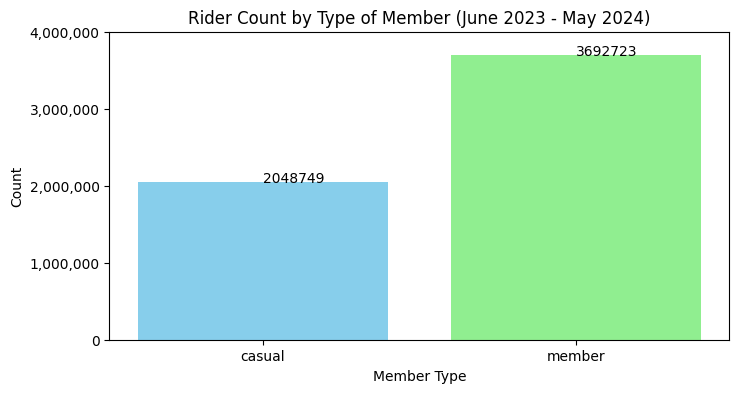

figure 1


In [55]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
rideid_analysis = clean_df.groupby('member_casual')['ride_id'].count().reset_index(name='count').copy()

plt.figure(figsize=(8, 4))
plt.bar(rideid_analysis['member_casual'], rideid_analysis['count'], color=['skyblue', 'lightgreen'])
plt.xlabel('Member Type')
plt.ylabel('Count')
plt.yticks([0, 1000000, 2000000, 3000000, 4000000], ['0','1,000,000', '2,000,000', '3,000,000', '4,000,000'])
addlabels(rideid_analysis['member_casual'], rideid_analysis['count'])
plt.title('Rider Count by Type of Member (June 2023 - May 2024)')
plt.show()
print('figure 1')

In these pie charts (Figure 2.1 and Figure 2.2), I visualized the distribution of rideable types by "member_casual" type. It can be observed that casual riders use electric bikes slightly more than members, while members prefer classic bikes more than casual riders. A notable difference is that 2.4% of the bikes ridden by casual riders are docked bikes, whereas in the members' chart, 0% of the bikes ridden are docked bikes.

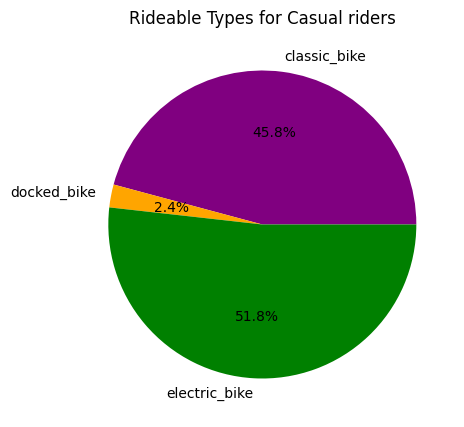

figure 2.1


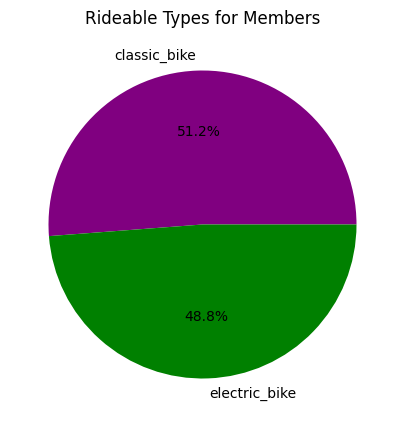

figure 2.2


In [56]:
# Creating plot
casual_df_rideabletype = casual_df.groupby('rideable_type')['ride_id'].count().reset_index(name='count').copy()
fig = plt.figure(figsize=(8, 5))
plt.pie(casual_df_rideabletype['count'], labels=casual_df_rideabletype['rideable_type'], autopct='%1.1f%%', colors =['purple', 'orange', 'green'])

# Show plot
plt.title('Rideable Types for Casual riders')
plt.show()
print('figure 2.1')

member_df_rideabletype = member_df.groupby('rideable_type')['ride_id'].count().reset_index(name='count').copy()
# Creating plot
fig = plt.figure(figsize=(8, 5))
plt.pie(member_df_rideabletype['count'], labels=member_df_rideabletype['rideable_type'], autopct='%1.1f%%', colors =['purple', 'green', 'orange'])

# Show plot
plt.title('Rideable Types for Members')
plt.show()
print('figure 2.2')

To explore seasonal activity behavior of member and casual riders, I generated a line chart shown in figure 3. it shows both casual and member counts are highest during spring and summer However casual rider's ride count peak in July where as members peak in August. Both ride counts plumet in the fall and winter season.

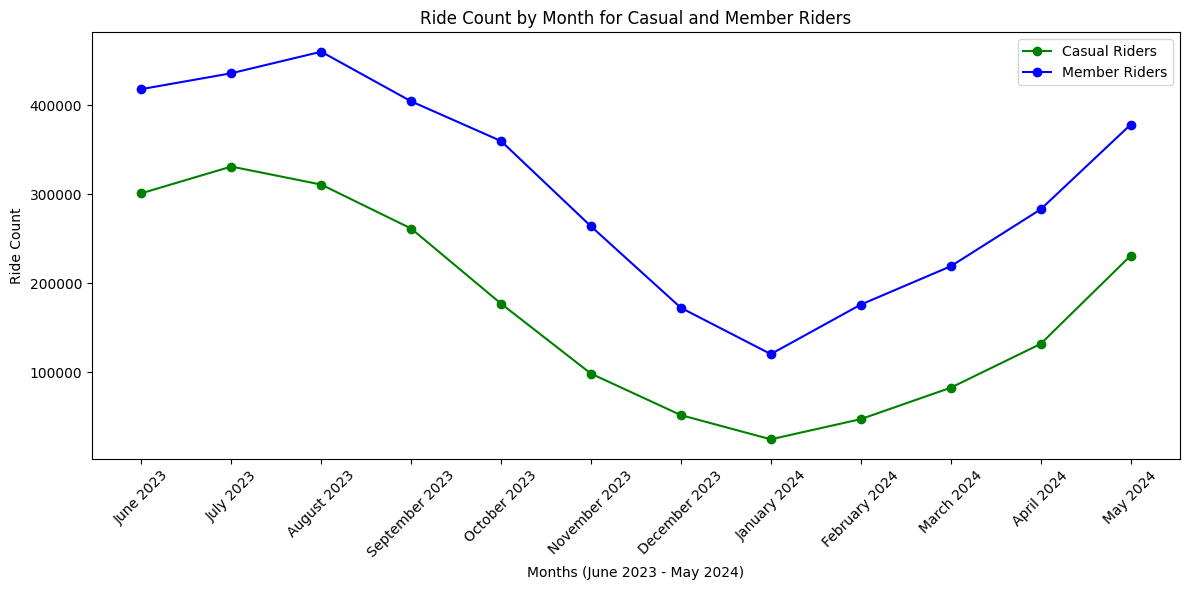

Figure 3


In [57]:
#_________________________________Plotting Graphs____________________________________

# To find the ride_id count for each member type, group by 'month_year' and calculate the count for 'ride_id'
casual_counts = casual_df.groupby('month_year')['ride_id'].count().reset_index(name='casual_count').copy()
member_counts = member_df.groupby('month_year')['ride_id'].count().reset_index(name='member_count').copy()


# Extract month names for line chart's x-axis labels
casual_counts['month_name'] = casual_counts['month_year'].dt.strftime('%B %Y')
member_counts['month_name'] = member_counts['month_year'].dt.strftime('%B %Y')



# Plotting Ride Count by Month for Casual and Member Riders
plt.figure(figsize=(12, 6))
plt.plot(casual_counts['month_name'], casual_counts['casual_count'], label='Casual Riders', color='green', marker='o')
plt.plot(member_counts['month_name'], member_counts['member_count'], label='Member Riders', color='blue', marker='o')
plt.xlabel('Months (June 2023 - May 2024)')
plt.ylabel('Ride Count')
plt.title('Ride Count by Month for Casual and Member Riders')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print('Figure 3')

To highlight the differences between casual and members riders, I created two bar charts. Figure 4.1 shows that casual riders have an average ride time of 28.20 minutes, while members average 12.92 minutes. In Figure 4.2, it is revealed that casual riders generally have ride lengths over 20 minutes through the week, whereas members average below 13 minutes through the week. These charts demonstrate that casual riders typically have longer ride times than members.

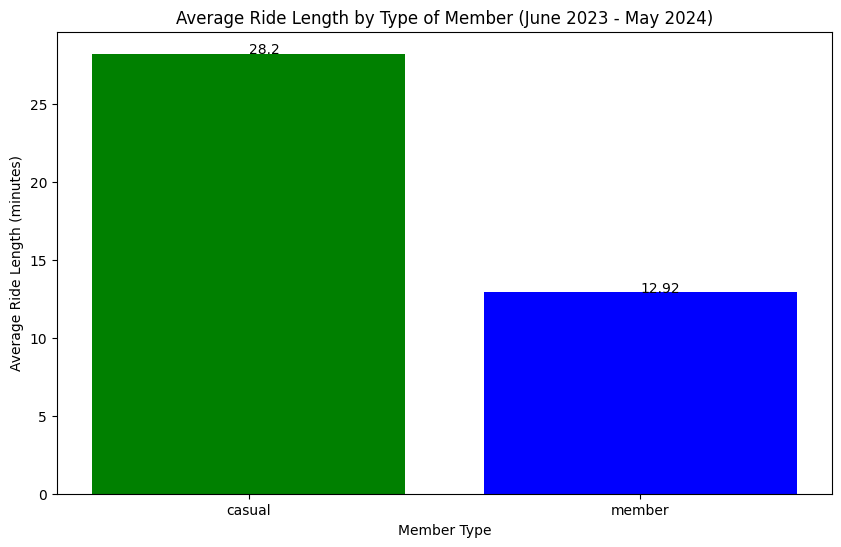

Figure 4.1




In [58]:
#finding the mean of 'ride_length' column by member type
ride_length_df = clean_df.groupby('member_casual')['ride_length'].mean().reset_index(name='mean_ride_length').copy()


#turn mean ride length into minutes 
ride_length_df['mean_ride_length'] = ride_length_df['mean_ride_length'].dt.total_seconds() / 60


# Plot the bar chart Average Ride Length by Type of Member 
plt.figure(figsize=(10, 6))
plt.bar(ride_length_df['member_casual'], ride_length_df['mean_ride_length'], color=['green', 'blue'])
plt.xlabel('Member Type')
plt.ylabel('Average Ride Length (minutes)')
addlabels(ride_length_df['member_casual'], round(ride_length_df['mean_ride_length'], 2))
plt.title('Average Ride Length by Type of Member (June 2023 - May 2024)')
plt.show()
print('Figure 4.1\n\n')

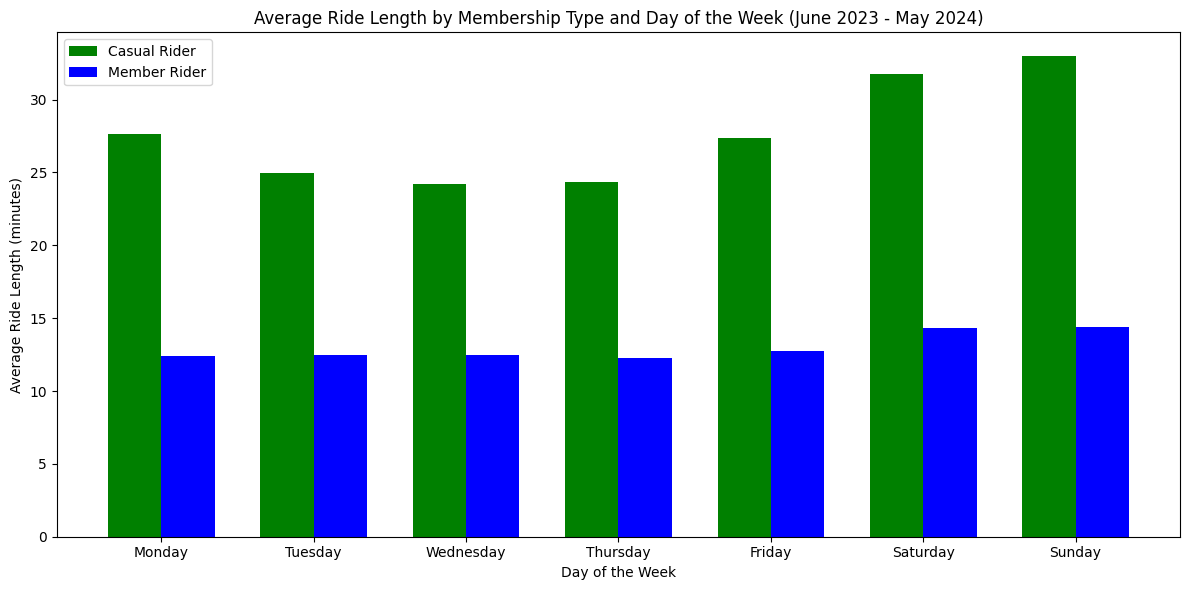

Figure 4.2


In [59]:
#find the mean of casual and members df
casual_analysis = casual_df.groupby('day_of_week')['ride_length'].mean().reset_index(name='mean_ride_length').copy()
member_analysis = member_df.groupby('day_of_week')['ride_length'].mean().reset_index(name='mean_ride_length').copy()

#find the count of casual and members df
casual_analysis['ride_id_count'] = casual_df.groupby('day_of_week')['ride_id'].count().values.copy()
member_analysis['ride_id_count'] = member_df.groupby('day_of_week')['ride_id'].count().values.copy()

#turn mean ride length into minutes 
casual_analysis['mean_ride_length'] = casual_analysis['mean_ride_length'].dt.total_seconds() / 60
member_analysis['mean_ride_length'] = member_analysis['mean_ride_length'].dt.total_seconds() / 60

#sorting 'day_of_week' to display correctly in the x-axis
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

casual_analysis['day_of_week'] = pd.Categorical(casual_analysis['day_of_week'], categories=day_order, ordered=True)
member_analysis['day_of_week'] = pd.Categorical(member_analysis['day_of_week'], categories=day_order, ordered=True)

casual_analysis = casual_analysis.sort_values('day_of_week')
member_analysis = member_analysis.sort_values('day_of_week')


# plotting Average Ride Length by Membership Type and Day of the Week (June 2023 - May 2024)
plt.figure(figsize=(12, 6))

# Positions for the bars
bar_width = 0.35
index = np.arange(len(member_analysis['day_of_week']))

# Plot bars
plt.bar(index - bar_width/2, casual_analysis['mean_ride_length'], bar_width, color='green', label='Casual Rider')
plt.bar(index + bar_width/2, member_analysis['mean_ride_length'], bar_width, color='blue', label='Member Rider')
plt.xlabel('Day of the Week')
plt.ylabel('Average Ride Length (minutes)')
plt.title('Average Ride Length by Membership Type and Day of the Week (June 2023 - May 2024)')
plt.xticks(index, member_analysis['day_of_week'])
plt.legend()
plt.tight_layout()
plt.show()
print('Figure 4.2')

Further analysis showed distinct patterns in ride activity between casual riders and members. A bar chart (figure 5) uncovered that member ride counts start high on Monday, peak on Thursday, and decrease over the weekend. Conversely, casual rider counts are low during weekdays, increase on Friday, peak on Saturday, and slightly decrease on Sunday. 

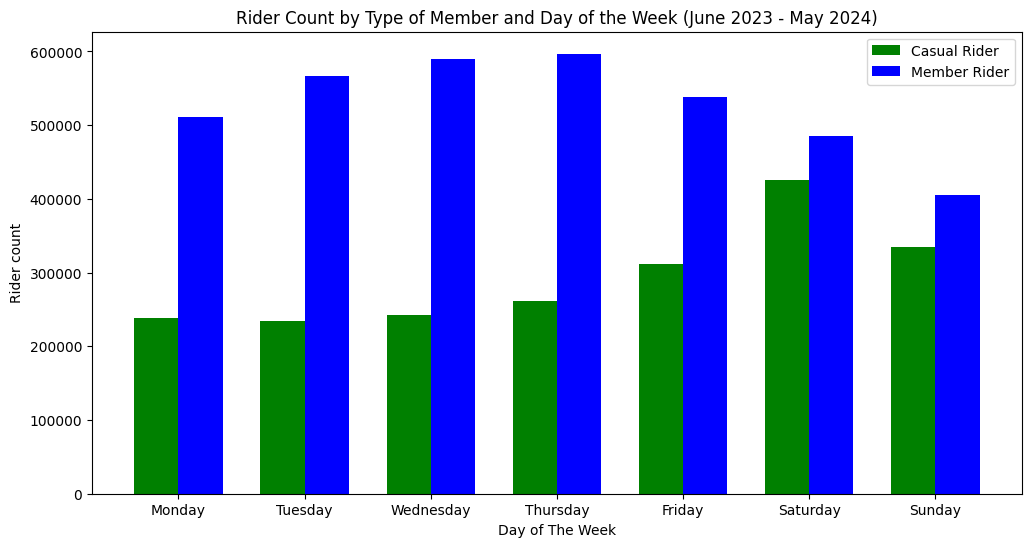

Figure 5


In [60]:
# Plotting Rider Count by Type of Member and Day of the Week (June 2023 - May 2024)
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, casual_analysis['ride_id_count'], bar_width, color = 'green', label='Casual Rider')
plt.bar(index + bar_width/2, member_analysis['ride_id_count'], bar_width, color = 'blue', label='Member Rider')
plt.xlabel('Day of The Week')
plt.ylabel('Rider count')
plt.title('Rider Count by Type of Member and Day of the Week (June 2023 - May 2024)')
plt.xticks(index, casual_analysis['day_of_week'])
plt.legend()
plt.show() 
print('Figure 5')

I created two bar charts, each highlighting the top 5 start stations for casual riders and members, respectively.

For casual riders, the chart reveals that Streeter Dr & Grand Ave is the most frequented starting point, followed by Dusable Lake Shore Dr & Monroe St, Millennium Park, Theater on the Lake, and Michigan Ave & Oak St.

In contrast, the chart for member riders shows that Clark St & Elm St is the preferred starting station, followed by Clinton St & Washington Blvd, Wabash Ave & Grand Ave, Canal St & Adams St, and Dearborn St & Monroe St, respectively.

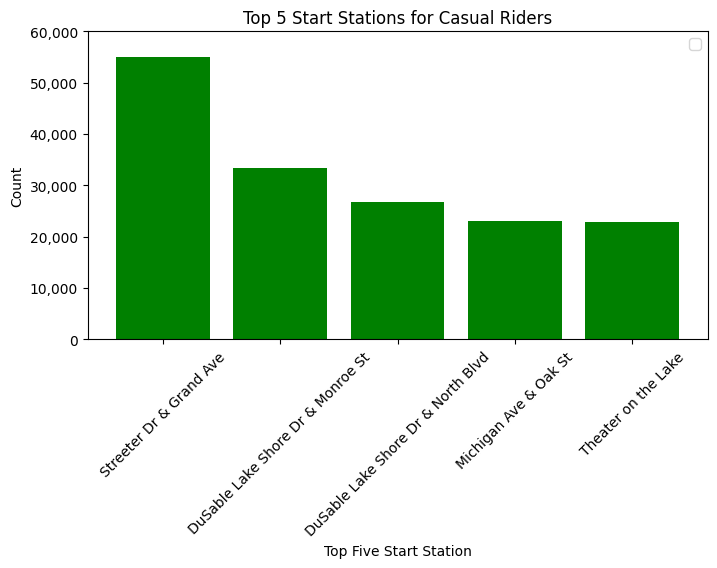

figure 6.1


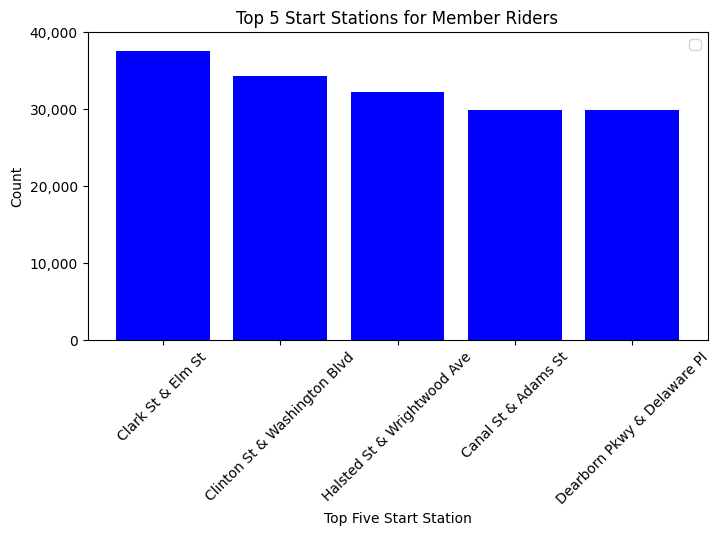

figure 6.2


In [61]:
# Grouping by 'start_station_name' and counting 'ride_id'
casual_df_start_station = casual_df.groupby('start_station_name')['ride_id'].count().reset_index(name='count').copy()

# Sorting the DataFrame by count in descending order and selecting the top 5 start stations for casual riders
casual_df_start_station_top5 = casual_df_start_station.sort_values(by='count', ascending=False).head(5)

#create bar chart
plt.figure(figsize=(8, 4))
plt.bar(casual_df_start_station_top5['start_station_name'], casual_df_start_station_top5['count'], color = 'green')
plt.xlabel('Top Five Start Station')
plt.ylabel('Count')
plt.yticks([0, 10000, 20000, 30000, 40000, 50000, 60000], ['0','10,000', '20,000', '30,000', '40,000', '50,000', '60,000'])
plt.title('Top 5 Start Stations for Casual Riders')
plt.legend()
plt.xticks(rotation=45)
plt.show()
print('figure 6.1')

# Grouping by 'start_station_name' and counting 'ride_id'
member_df_start_station = member_df.groupby('start_station_name')['ride_id'].count().reset_index(name='count').copy()

# Sorting the DataFrame by count in descending order and selecting the top 5 start stations for members
member_df_start_station_top5 = member_df_start_station.sort_values(by='count', ascending=False).head(5)

#create bar chart
plt.figure(figsize=(8, 4))
plt.bar(member_df_start_station_top5['start_station_name'], member_df_start_station_top5['count'], color = 'blue')
plt.xlabel('Top Five Start Station')
plt.ylabel('Count')
plt.yticks([0, 10000, 20000, 30000, 40000], ['0','10,000', '20,000', '30,000', '40,000'])
plt.title('Top 5 Start Stations for Member Riders')
plt.legend()
plt.xticks(rotation=45)
plt.show()
print('figure 6.2')

I created two bar charts (Figure 7.1 and Figure 7.2), each showcasing the top 5 end stations by "member_casual" type.

In Figure 7.1, which focuses on casual riders, Streeter Dr & Grand Ave emerges as the most popular end station, followed by Dusable Lake Shore Dr & Monroe St, Dusable Lake Shore Dr & North Blvd, Michigan Ave & Oak St, and Theater on the Lake.

Figure 7.2, which highlights member riders, shows that Kingsbury St & Kinzie St is the most frequented end station, followed by Wilton Ave & Belmont Ave, Canal St & Adams St, LaSalle St & Illinois St, and Dearborn Pkwy & Delaware Pl.

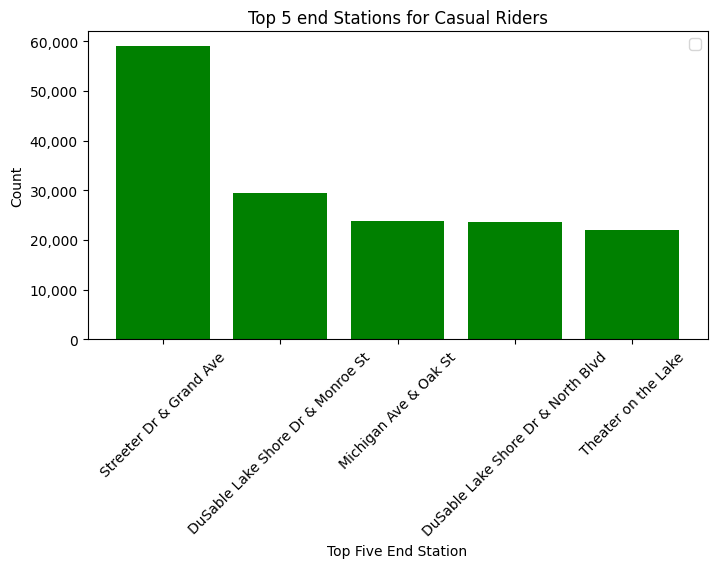

figure 7.1


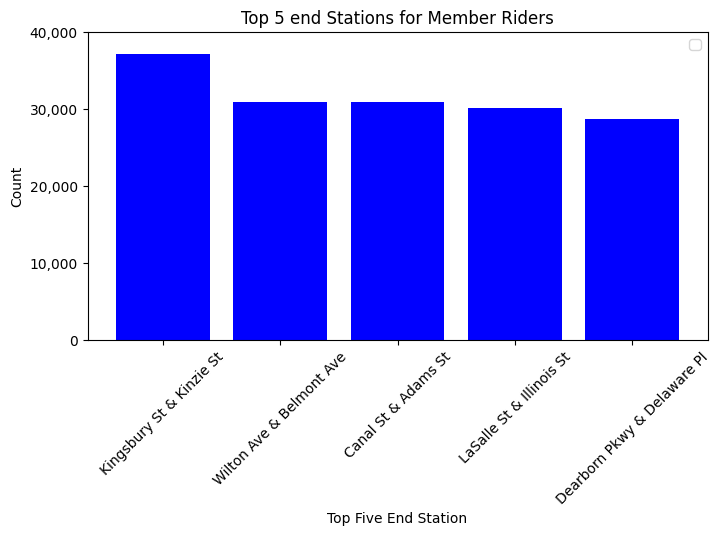

figure 7.2


In [62]:
# Grouping by 'end_station_name' and counting 'ride_id'
casual_df_end_station = casual_df.groupby('end_station_name')['ride_id'].count().reset_index(name='count').copy()

# Sorting the DataFrame by count in descending order and selecting the top 5 end stations for casual riders
casual_df_end_station_top5 = casual_df_end_station.sort_values(by='count', ascending=False).head(5)

#create bar chart
plt.figure(figsize=(8, 4))
plt.bar(casual_df_end_station_top5['end_station_name'], casual_df_end_station_top5['count'], color = 'green')
plt.xlabel('Top Five End Station')
plt.ylabel('Count')
plt.yticks([0, 10000, 20000, 30000, 40000, 50000, 60000], ['0','10,000', '20,000', '30,000', '40,000', '50,000', '60,000'])
plt.title('Top 5 end Stations for Casual Riders')
plt.legend()
plt.xticks(rotation=45)
plt.show()
print('figure 7.1')
      
# Grouping by 'end_station_name' and counting 'ride_id'
member_df_end_station = member_df.groupby('end_station_name')['ride_id'].count().reset_index(name='count').copy()

# Sorting the DataFrame by count in descending order and selecting the top 5 end stations for members
member_df_end_station_top5 = member_df_end_station.sort_values(by='count', ascending=False).head(5)

#create bar chart
plt.figure(figsize=(8, 4))
plt.bar(member_df_end_station_top5['end_station_name'], member_df_end_station_top5['count'], color = 'blue')
plt.xlabel('Top Five End Station')
plt.ylabel('Count')
plt.yticks([0, 10000, 20000, 30000, 40000], ['0','10,000', '20,000', '30,000', '40,000'])
plt.title('Top 5 end Stations for Member Riders')
plt.legend()
plt.xticks(rotation=45)
plt.show()
print('figure 7.2')

# Findings

The analysis reveals several key differences between casual riders and members:

Rider Distribution:

* The data shows a significant difference between the number of casual riders and members, with members outnumbering casual riders by 1,643,974 riders (Figure 1).

Seasonal Riding Patterns:

* Both casual riders and members exhibit increased activity during spring and summer. However, casual riders peak in July, while members peak in August. Both groups see a decline in ride counts during the fall and winter months (Figure 3).

Ride Duration:

* Casual riders tend to have longer ride durations compared to members. The average ride time for casual riders is 28.20 minutes, whereas members average 12.92 minutes. Throughout the week, casual riders generally have rides exceeding 20 minutes, while members average below 13 minutes (Figures 4.1 and 4.2).

Weekly Ride Activity:

* There are distinct patterns in ride activity between the two groups. Members’ ride counts are highest on weekdays, peaking on Thursday and tapering off over the weekend. Conversely, casual riders are more active on weekends, with their counts peaking on Saturday (Figure 5).

Popular Start and End Stations:

* For casual riders, the most frequented starting station to casual rider's ride is Streeter Dr & Grand Ave, followed by Dusable Lake Shore Dr & Monroe St, Millennium Park, Theater on the Lake, and Michigan Ave & Oak St. (Figures 6.1). As for end stations, Streeter Dr & Grand Ave emerges as the most popular end station, followed by Dusable Lake Shore Dr & Monroe St, Dusable Lake Shore Dr & North Blvd, Michigan Ave & Oak St, and Theater on the Lake (Figures 7.1).

* Members, on the other hand, prefer starting station Clark St & Elm St followed by Clinton St & Washington Blvd, Wabash Ave & Grand Ave, Canal St & Adams St, and Dearborn St & Monroe St (Figures 6.2). For ending stations, Kingsbury St & Kinzie St is the most popular followed by Wilton Ave & Belmont Ave, Canal St & Adams St, LaSalle St & Illinois St, and Dearborn Pkwy & Delaware Pl (Figures 7.2).

# Recommendations 
To address the question of how to convert casual riders into annual members, I have made three recommendations.

* Targeted Membership Campaigns: Set up targeted membership ads during the months when casual riders are most active, specifically June, July, and August. Given that casual riders are particularly active on weekends, with peak activity on Saturdays, focus these ads on weekend days to maximize visibility and engagement. This strategy will capture the attention of casual riders during their highest activity periods and encourage them to sign up for annual memberships.
* Strategic Station Marketing: Implementing membership advertisements at the top 3 most popular starting stations (Streeter Dr & Grand Ave, Dusable Lake Shore Dr & Monroe St, Millennium Park) and top 3 most popular ending stations (Streeter Dr & Grand Ave, Dusable Lake Shore Dr & Monroe St, Dusable Lake Shore Dr & North Blvd) could effectively encourage more casual riders to become members.
* Highlighting Membership Value for Longer Rides: On average, casual riders ride for 28 minutes per trip. Highlighting the cost savings of a membership compared to day passes for longer rides could further incentivize casual riders to sign up for memberships.